In [153]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import calendar
import matplotlib.pyplot as plt
import math
from shapely.geometry import Polygon, Point
import pandas as pd
import json

from shapely.geometry import Polygon, mapping
from shapely.ops import cascaded_union

In [154]:
negative_df_path = '../filtered_data/Negative_Incident.csv'
incident_df =  pd.read_csv('../filtered_data/Filtered_Incident_Report.csv')

In [155]:

# %%
with open('../filtered_data/sf_neighborhoods.geojson', 'r') as f:
    geo_data = json.load(f)

# %%

nbr_to_poly = dict()
for nbr in geo_data['features']:
    nbr_to_poly[nbr['properties']['name']] = Polygon(nbr['geometry']['coordinates'][0][0])
# %%

In [156]:
incident_df['Incident Datetime'] = list(map(lambda x: datetime.strptime(x, '%Y/%m/%d %I:%M:%S %p'), incident_df['Incident Datetime']))
filter_dt = lambda dt: (dt.year==2019)
incident_2019_df = incident_df.loc[incident_df['Incident Datetime'].apply(filter_dt), :][['Incident Datetime', 'Latitude', 'Longitude']].dropna()
# %%
hour = incident_2019_df['Incident Datetime'].apply(lambda dt: dt.hour).tolist()
dow = incident_2019_df['Incident Datetime'].apply(lambda dt: dt.weekday()).tolist()
month = incident_2019_df['Incident Datetime'].apply(lambda dt: dt.month).tolist()
latitude = incident_2019_df['Latitude'].tolist()
longitude = incident_2019_df['Longitude'].tolist()
label = [1]*incident_2019_df.shape[0]

In [157]:
neg_count = 6*incident_2019_df.shape[0]
for _ in range(neg_count):
    hour.append(np.random.randint(24))
    dow.append(np.random.randint(7))
    month.append(np.random.randint(1, 13))   
    label.append(0)

polygons = []

for feat in geo_data['features']:
    polygon = Polygon([ (coor[0], coor[1]) for coor in  feat['geometry']['coordinates'][0][0] ])
    polygons.append(polygon)

new_geometry = mapping(cascaded_union(polygons)) # This line merges the polygones

new_feature = dict(type='Feature', id="", properties=dict(Name=""),geometry=dict(type=new_geometry['type'], coordinates=new_geometry['coordinates']))

dissolved = []
for tup in new_geometry['coordinates'][0][0]:
    dissolved.append([tup[0], tup[1]])

sf_polygon = Polygon(dissolved)

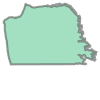

In [158]:
sf_polygon

In [159]:
neg_count

29370

In [165]:
while len(longitude) <  len(incident_2019_df)+neg_count:
    lat = np.random.uniform(miny, maxy)
    lon = np.random.uniform(minx, maxx) 
    pnt = Point(lon, lat)
    if poly.contains(pnt):
        latitude.append(lat)
        longitude.append(lon)

In [167]:
len(latitude)

34265

In [166]:
len(dow)

34265

In [168]:
negative_data = pd.DataFrame({'hour': hour, 
              'dow': dow,
              'month': month,
              'latitude': latitude,
              'longitude': longitude,
              'label': label})

In [169]:
negative_data

,hour,dow,month,latitude,longitude,label
0,0,4,8,37.777372,-122.399763,1
1,23,5,7,37.736061,-122.424466,1
2,17,6,8,37.730249,-122.412338,1
3,1,1,1,37.786101,-122.418088,1
4,8,1,1,37.719109,-122.483104,1
...,...,...,...,...,...,...
34260,18,1,4,37.754696,-122.386202,0
34261,6,6,6,37.791838,-122.417884,0
34262,16,1,3,37.729050,-122.366683,0
34263,17,0,3,37.745915,-122.434525,0


In [170]:
for val in negative_data.columns.tolist():
    print(np.unique(negative_data[val]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0 1 2 3 4 5 6]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[37.70802018 37.70805761 37.70816172 ... 37.82944921 37.8296623
 37.82999075]
[-122.51465562 -122.51460424 -122.51454783 ... -122.35786963 -122.35760155
 -122.35724229]
[0 1]


In [171]:
len(negative_data[negative_data['label'] == 1])/len(negative_data)

0.14285714285714285

In [172]:
negative_data.to_csv(negative_df_path)

In [178]:
incident_2019_df.shape[0] * 7 == negative_data.shape[0]

True